# Regression on matched data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%config InlineBackend.figure_format='retina'

matched on: columns that are correlated with `anxiety`(‘risk_of_depression’,‘lone_isolated’,‘dx_any’,‘persist’ ,‘sui_idea’,‘meds_any’,‘abuse_life’,‘sexual_h’,‘finpast’,‘satisfied_overall’,‘fincur’,‘positive_mental_health’) and `online`(‘degree_ass’, ‘hours_work_paid’, ‘age’, ‘enroll’, ‘degree_bach’), and the final iteration of matching droped (‘sui_idea’, ‘sexual_h’, ‘degree_ass’, ‘abuse_life’), meaning we only used----> **‘risk_of_depression’,‘lone_isolated’,‘dx_any’,‘persist’ ,‘meds_any’,‘finpast’,‘satisfied_overall’,‘fincur’,‘positive_mental_health’,‘hours_work_paid’, ‘age’, ‘enroll’, ‘degree_bach’**

In [3]:
# load data
matched_data = pd.read_csv("https://raw.githubusercontent.com/MIDS-at-Duke/uds-2023-team-1/main"+
                           "/30_intermediate_files/matched_data_new.csv?token=GHSAT0AAAAAAB5IWVS42EKU4ACXVUOCC26GZB5QRVA")

In [4]:
matched_data.head()

,Unnamed: 0,startdate,recordeddate,responseid,age,sex_birth,gender_male,gender_female,gender_transm,gender_transf,...,weights,match_group_size,match_group,week-year,state,new_case,state_new,2020,cases_per_cap,cases_per_10k
0,0,2022-04-22 09:54:31,2022-04-22 13:49:38,R_32J8GAWh6IOIYxm,20.0,2.0,1.0,0.0,0.0,0.0,...,1.000000,2.0,11748.0,16-2022,CA,37047,California,39501653,0.000938,9.378595
1,1,2022-04-11 12:35:38,2022-04-11 12:59:31,R_72I28iy8iqGtOnL,27.0,2.0,1.0,0.0,0.0,0.0,...,0.394260,4.0,7143.0,15-2022,CA,25540,California,39501653,0.000647,6.465552
2,2,2022-04-15 13:40:00,2022-04-15 16:36:31,R_1qdE55ZSFYCZrfT,22.0,1.0,0.0,1.0,0.0,0.0,...,1.000000,2.0,13890.0,15-2022,CA,25540,California,39501653,0.000647,6.465552
3,3,2022-04-12 18:50:55,2022-04-12 19:10:41,R_WjGvkFnenaDKdwd,19.0,1.0,0.0,1.0,0.0,0.0,...,1.182779,2.0,5052.0,15-2022,CA,25540,California,39501653,0.000647,6.465552
4,4,2022-04-15 18:21:14,2022-04-15 18:52:05,R_2ciNNqFgeQYt2pR,19.0,2.0,1.0,0.0,0.0,0.0,...,1.182779,2.0,16008.0,15-2022,CA,25540,California,39501653,0.000647,6.465552


In [5]:
matched_data.shape

(40054, 91)

In [6]:
matched_data.columns

Index(['Unnamed: 0', 'startdate', 'recordeddate', 'responseid', 'age',
       'sex_birth', 'gender_male', 'gender_female', 'gender_transm',
       'gender_transf', 'sexual_other', 'gender_nonbin', 'gender_selfid',
       'sexual_h', 'sexual_l', 'sexual_g', 'sexual_bi', 'sexual_queer',
       'sexual_quest', 'sexual_asexual', 'sexual_pan', 'race_black',
       'race_ainaan', 'race_asian', 'race_his', 'race_pi', 'race_mides',
       'race_white', 'race_other', 'international', 'educ_par1', 'educ_par2',
       'scholarship_status_1', 'children_dep', 'hours_work_paid', 'transfer',
       'yr_sch', 'enroll', 'persist', 'disab_1', 'disab_2',
       'positive_mental_health', 'risk_of_depression', 'anxiety', 'timestud',
       'sui_idea', 'lone_isolated', 'abuse_life', 'assault_emo', 'alc_any',
       'sub_cig', 'sub_any', 'exerc', 'sleep_wknight', 'dx_any', 'knowwher',
       'meds_any', 'degree_ass', 'degree_bach', 'degree_ma', 'degree_jd',
       'degree_md', 'degree_phd', 'degree_other', '

In [7]:
# check different number of values in each column

for col in matched_data.columns:
    print(col, matched_data[col].nunique())


Unnamed: 0 40054
startdate 39682
recordeddate 38920
responseid 40054
age 46
sex_birth 4
gender_male 2
gender_female 2
gender_transm 2
gender_transf 2
sexual_other 2
gender_nonbin 2
gender_selfid 2
sexual_h 2
sexual_l 2
sexual_g 2
sexual_bi 2
sexual_queer 2
sexual_quest 2
sexual_asexual 2
sexual_pan 2
race_black 2
race_ainaan 2
race_asian 2
race_his 2
race_pi 2
race_mides 2
race_white 2
race_other 2
international 2
educ_par1 8
educ_par2 8
scholarship_status_1 2
children_dep 5
hours_work_paid 135
transfer 2
yr_sch 7
enroll 3
persist 6
disab_1 4
disab_2 3
positive_mental_health 2
risk_of_depression 5
anxiety 22
timestud 7
sui_idea 2
lone_isolated 2
abuse_life 5
assault_emo 2
alc_any 2
sub_cig 2
sub_any 2
exerc 5
sleep_wknight 42
dx_any 2
knowwher 2
meds_any 2
degree_ass 2
degree_bach 2
degree_ma 2
degree_jd 2
degree_md 2
degree_phd 2
degree_other 2
degree_nd 2
gr_a 2
gr_b 2
gr_c 2
gr_d 2
gr_f 2
gr_none 2
gr_dk 2
satisfied_overall 6
deport_worry 4
fincur 5
finpast 5
food_worry 3
food_notla

## Explore the relationship between state related covid severity and anxiety

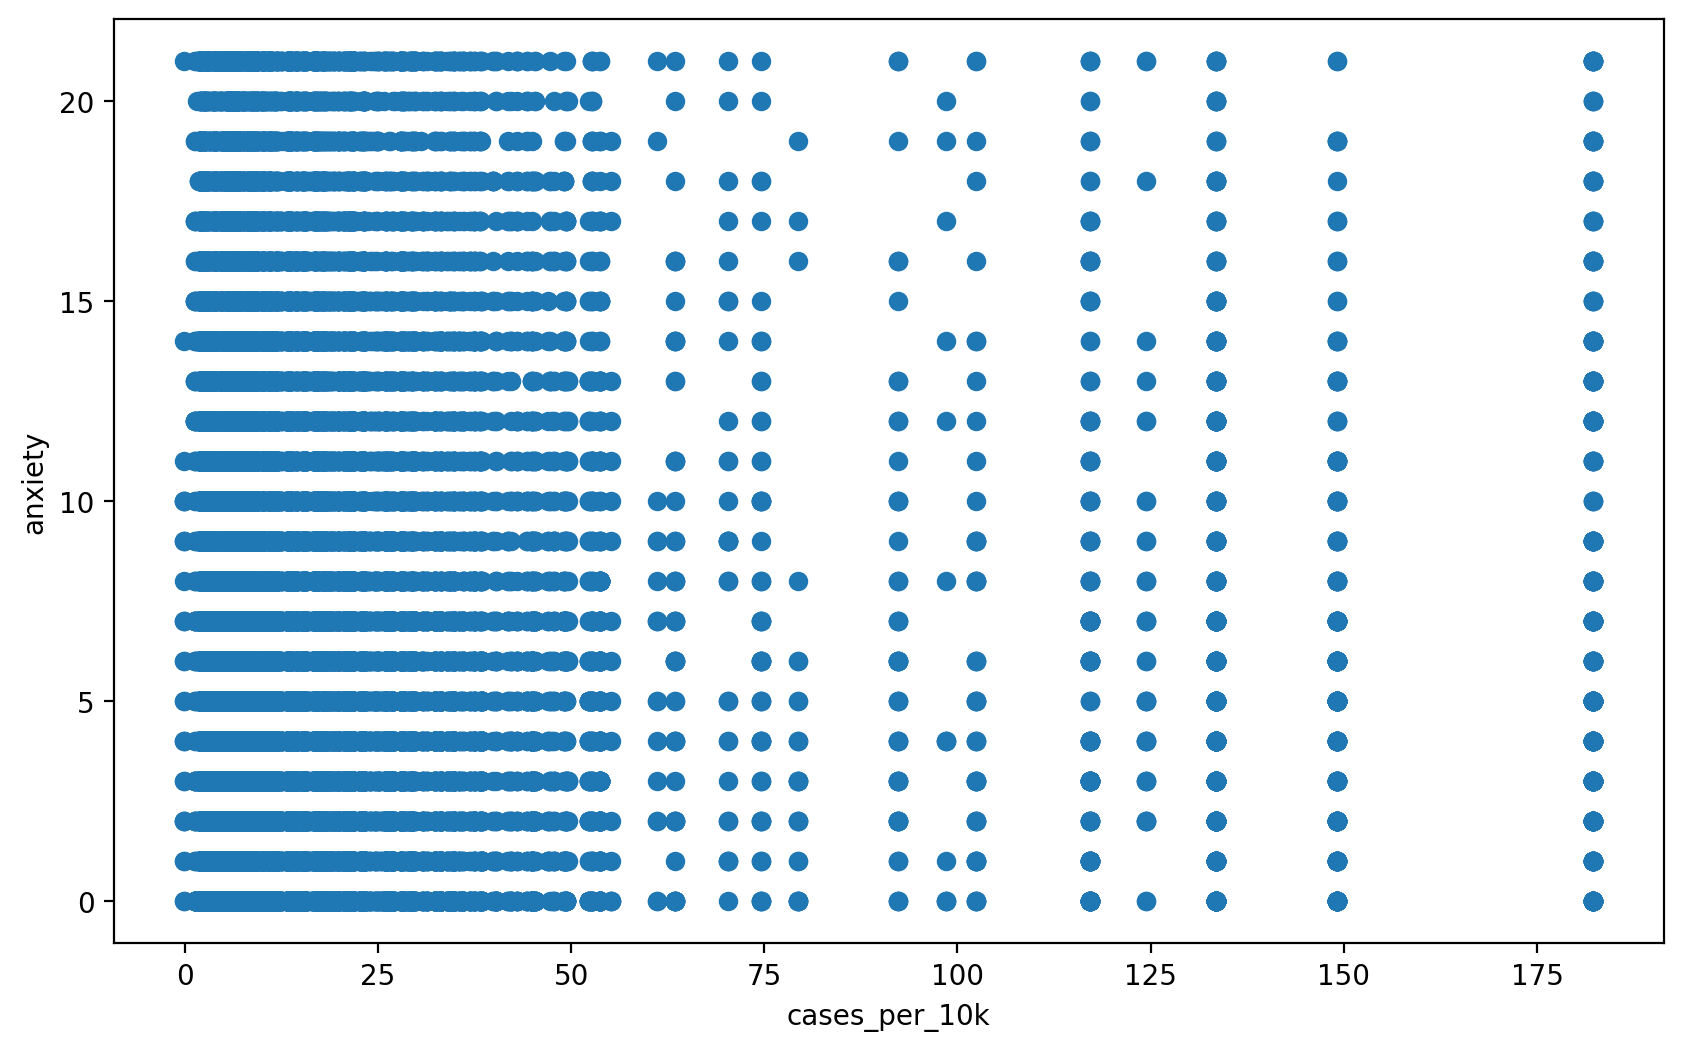

In [8]:
#anxiety and cases_per_10k
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(matched_data['cases_per_10k'], matched_data['anxiety'])
plt.xlabel('cases_per_10k')
plt.ylabel('anxiety')
plt.show()


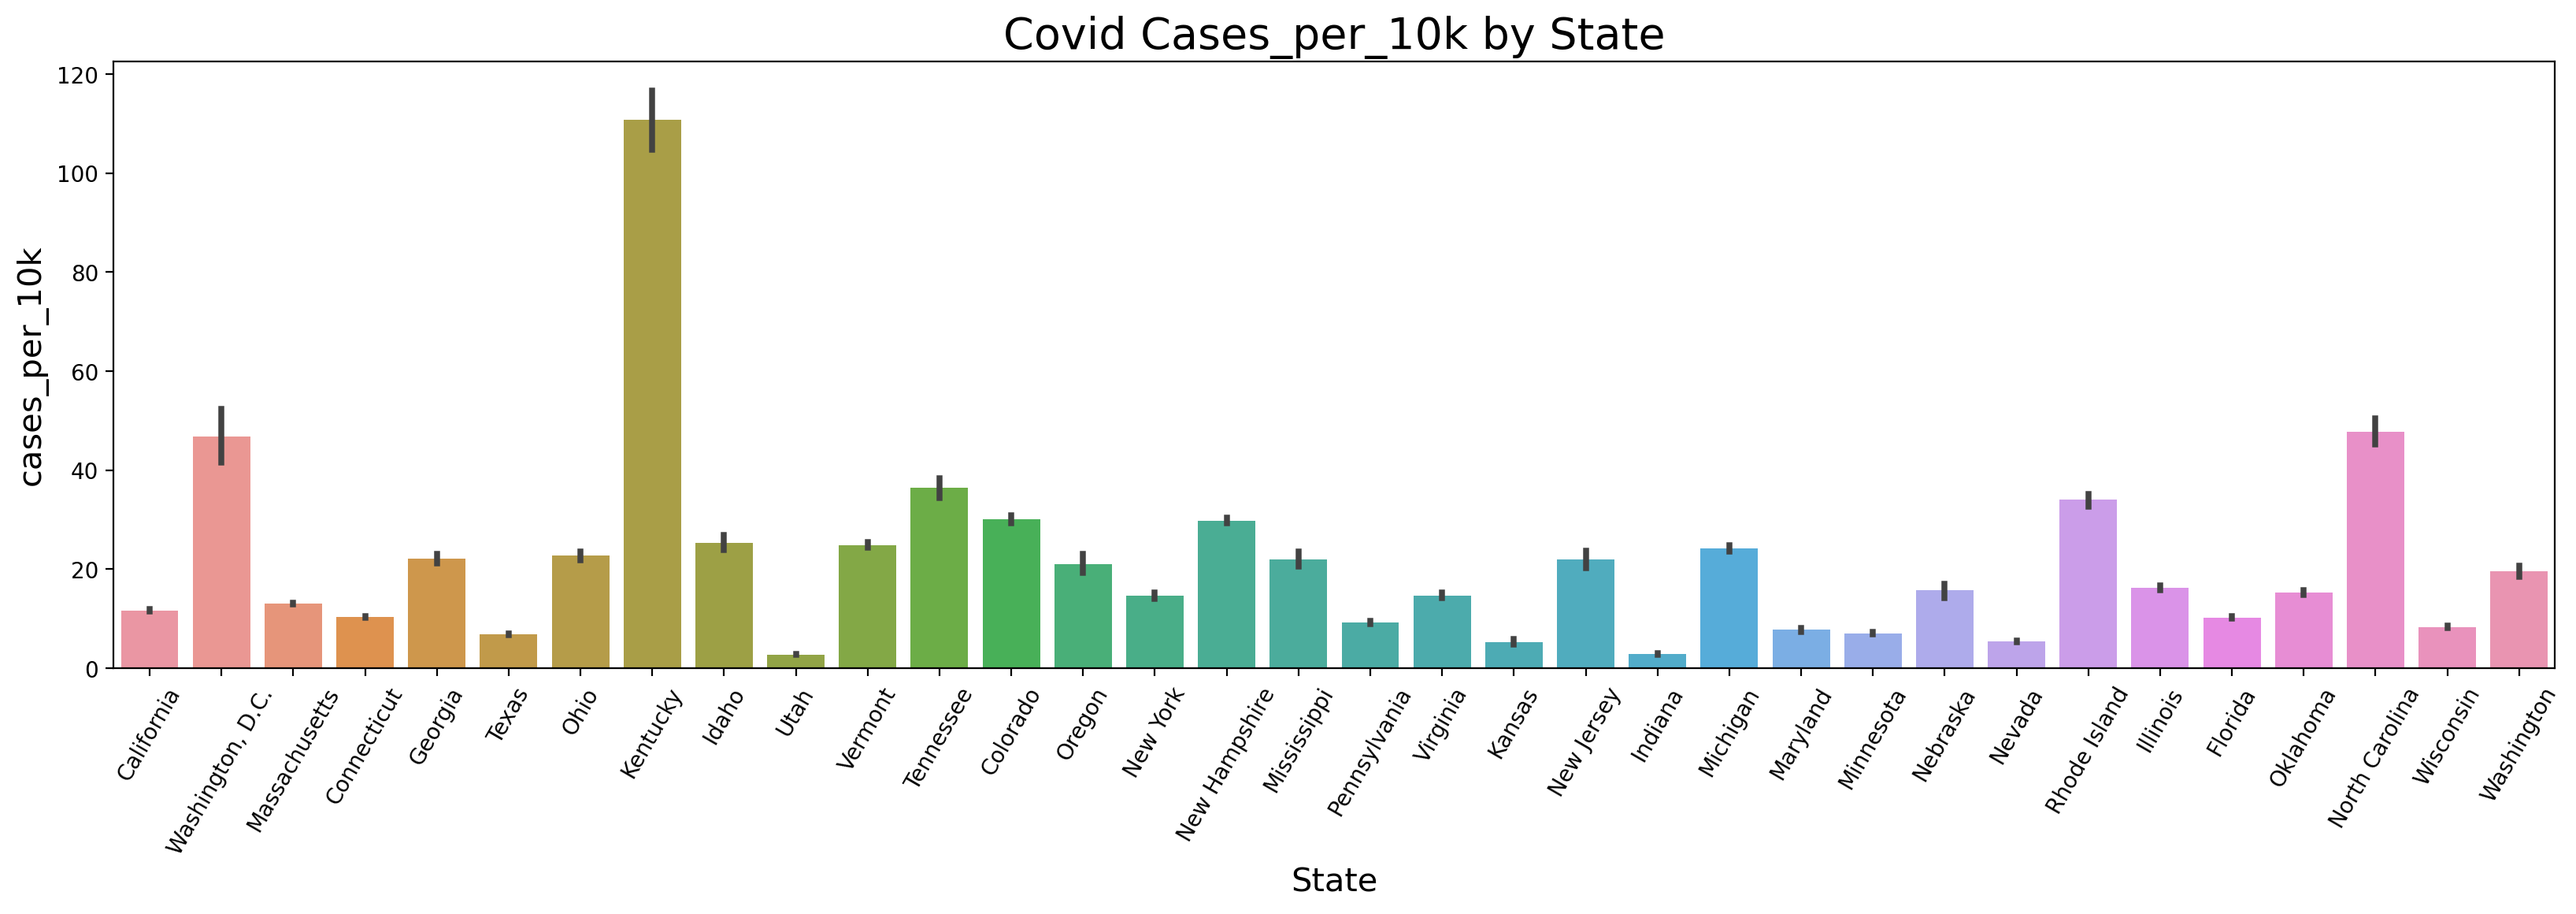

In [9]:
# create bar plot
plt.figure(figsize=(20, 5))
sns.barplot(x='state_new', y='cases_per_10k', data=matched_data)
plt.xticks(rotation=60, fontsize = 10)
plt.xlabel('State', fontsize = 15)
plt.ylabel('cases_per_10k', fontsize = 15)
plt.title('Covid Cases_per_10k by State', fontsize = 20)
plt.show()

In [10]:
# get the top 5 states with highest cases_per_10k
top5 = matched_data.groupby('state_new')['cases_per_10k'].mean().sort_values(ascending=False).head(5).index
print('the top 5 states with highest cases_per_10k are:', top5[0], top5[1], top5[2], top5[3], top5[4])

#get the bottom 5 states with lowest cases_per_10k
bottom5 = matched_data.groupby('state_new')['cases_per_10k'].mean().sort_values(ascending=True).head(5).index
print('the bottom 5 states with lowest cases_per_10k are:', bottom5[0], bottom5[1], bottom5[2], bottom5[3], bottom5[4])

the top 5 states with highest cases_per_10k are: Kentucky North Carolina Washington, D.C. Tennessee Rhode Island
the bottom 5 states with lowest cases_per_10k are: Utah Indiana Kansas Nevada Texas


* From the scatter above, there's no clear relationship between cases_per_10k and anxiety level. 

### Interaction: cases_per_10k and is_online

In [11]:
smf.wls(formula='anxiety ~ cases_per_10k*C(is_online)', data=matched_data, weights=matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.366
Date:                Mon, 17 Apr 2023   Prob (F-statistic):              0.251
Time:                        12:40:16   Log-Likelihood:            -1.2822e+05
No. Observations:               40054   AIC:                         2.565e+05
Df Residuals:                   40050   BIC:                         2.565e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.6292      0.048    159.895      0.000       7.536       7.723
C(is_online)[T.1.0]                  -0.0898      0.071     -1.264      0.206      -0.229       0.049
cases_per_10k                        -0.0027      0.001     -1.918      0.055      -0.005    5.96e-05
cases_per_10k:C(is_online)[T.1.0]     0.0027      0.002      1.128      0.259      -0.002       0.007
==============================================================================
Omnibus:                     2834.332   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3442.917
Skew:                           0.712   Prob(JB):                         0.00
Kurtosis:                       2.816   Cond. No.                         93.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* **For online students, with i unit increase in covid cases_per_10k, their anxiety level will increase by 0.0027 compared to inperson, but it is not statistically significant.**

* **After adding other control variables, For online students, with i unit increase in covid cases_per_10k, their anxiety level will decrease by 0.0006 compared to inperson, but it is not statistically significant**

In [12]:
smf.wls('anxiety ~ age+C(sex_birth)+gender_male+gender_female+gender_transm+gender_transf+sexual_other'+
        '+gender_nonbin+gender_selfid+sexual_h+sexual_l+sexual_g+sexual_bi+sexual_queer+sexual_quest+sexual_asexual'+
        '+sexual_pan+race_black+race_ainaan+race_asian+race_his+race_pi+race_mides+race_white+race_other'+
        '+C(international)+ C(educ_par1)+ C(educ_par2)+ C(scholarship_status_1)+C(children_dep)+hours_work_paid'+
        '+C(transfer)+C(yr_sch)+C(enroll)+C(persist)+C(disab_1)+C(disab_2)+C(positive_mental_health)'+
        '+C(risk_of_depression)+C(timestud)+C(sui_idea)+C(lone_isolated)+C(abuse_life)+C(assault_emo)'+
        '+C(alc_any)+C(sub_cig)+C(sub_any)+C(exerc)+sleep_wknight+C(dx_any)+C(knowwher)+C(meds_any)'+
        '+degree_ass+degree_bach+degree_ma+degree_jd+degree_md+degree_phd+degree_other+degree_nd'+
        '+gr_a+gr_b+gr_c+gr_d+gr_f+gr_none+gr_dk+C(satisfied_overall)+C(deport_worry)+C(fincur)+C(finpast)'+
        '+C(food_worry)+C(food_notlast)+C(state_new)+C(first_gen)+C(is_online)*cases_per_10k', data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.545
Model:                            WLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     284.6
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:40:19   Log-Likelihood:            -1.1245e+05
No. Observations:               40054   AIC:                         2.252e+05
Df Residuals:                   39885   BIC:                         2.267e+05
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             9.1423      0.450     20.306      0.000       8.260      10.025
C(sex_birth)[T.2.0]                  -1.1364      0.213     -5.326      0.000      -1.555      -0.718
C(sex_birth)[T.3.0]                  -0.8676      0.920     -0.943      0.346      -2.671       0.936
C(sex_birth)[T.7.0]                  -0.8014      0.697     -1.149      0.251      -2.168       0.566
C(international)[T.1.0]              -0.1817      0.085     -2.149      0.032      -0.347      -0.016
C(educ_par1)[T.2.0]                   0.0727      0.159      0.458      0.647      -0.239       0.384
C(educ_par1)[T.3.0]                   0.1781      0.141      1.264      0.206      -0.098       0.454
C(educ_par1)[T.4.0]                   0.2394      0.158      1.514      0.130      -0.070       0.549
C(educ_par1)[T.5.0]                   0.2232      0.164      1.365      0.172      -0.097       0.544
C(educ_par1)[T.6.0]                   0.1530      0.154      0.994      0.320      -0.149       0.455
C(educ_par1)[T.7.0]                   0.2884      0.156      1.855      0.064      -0.016       0.593
C(educ_par1)[T.8.0]                  -0.0898      0.271     -0.332      0.740      -0.620       0.441
C(educ_par2)[T.2.0]                   0.0386      0.154      0.250      0.802      -0.264       0.341
C(educ_par2)[T.3.0]                   0.0718      0.140      0.513      0.608      -0.203       0.346
C(educ_par2)[T.4.0]                   0.1921      0.154      1.247      0.212      -0.110       0.494
C(educ_par2)[T.5.0]                   0.2316      0.160      1.446      0.148      -0.082       0.545
C(educ_par2)[T.6.0]                   0.1702      0.151      1.127      0.260      -0.126       0.466
C(educ_par2)[T.7.0]                   0.0768      0.153      0.501      0.616      -0.224       0.377
C(educ_par2)[T.8.0]                  -0.1085      0.192     -0.564      0.573      -0.486       0.269
C(scholarship_status_1)[T.1.0]        0.0138      0.046      0.301      0.763      -0.076       0.103
C(children_dep)[T.2.0]                0.1809      0.097      1.861      0.063      -0.010       0.371
C(children_dep)[T.3.0]                0.1573      0.106      1.487      0.137      -0.050       0.365
C(children_dep)[T.4.0]                0.1644      0.145      1.137      0.256      -0.119       0.448
C(children_dep)[T.5.0]               -0.0164      0.153     -0.107      0.915      -0.316       0.284
C(transfer)[T.1.0]                   -0.0973      0.072     -1.344      0.179      -0.239       0.045
C(yr_sch)[T.2.0]                      0.1564      0.052      3.026      0.002       0.055       0.258
C(yr_sch)[T.3.0]                      0.3132      0.059      5.283      0.000       0.197       0.429
C(yr_sch)[T.4.0]       

In [13]:
smf.wls(formula='anxiety ~ age+C(sex_birth)+gender_male+gender_female+gender_transm+gender_transf+sexual_other'+
        '+gender_nonbin+gender_selfid+sexual_h+sexual_l+sexual_g+sexual_bi+sexual_queer+sexual_quest+sexual_asexual'+
        '+sexual_pan+race_black+race_ainaan+race_asian+race_his+race_pi+race_mides+race_white+race_other'+
        '+hours_work_paid'+
        '+C(persist)'+
        '+C(enroll)+C(positive_mental_health)'+
        '+C(risk_of_depression)+C(sui_idea)+C(lone_isolated)'+
        '+C(dx_any)+C(knowwher)+C(meds_any)'+
        '+degree_ass+degree_bach+degree_ma+degree_jd+degree_md+degree_phd+degree_other+degree_nd'+
        '+gr_a+gr_b+gr_c+gr_d+gr_f+gr_none+gr_dk+C(satisfied_overall)+C(finpast)'+
        '+cases_per_10k*C(is_online)', data=matched_data, weights=matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.531
Model:                            WLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     629.1
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:40:20   Log-Likelihood:            -1.1306e+05
No. Observations:               40054   AIC:                         2.263e+05
Df Residuals:                   39981   BIC:                         2.269e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             8.8200      0.344     25.602      0.000       8.145       9.495
C(sex_birth)[T.2.0]                  -1.0665      0.216     -4.942      0.000      -1.490      -0.644
C(sex_birth)[T.3.0]                  -0.9860      0.932     -1.058      0.290      -2.812       0.840
C(sex_birth)[T.7.0]                  -0.8078      0.707     -1.143      0.253      -2.193       0.577
C(persist)[T.2.0]                     0.0452      0.047      0.963      0.336      -0.047       0.137
C(persist)[T.3.0]                     0.1698      0.066      2.578      0.010       0.041       0.299
C(persist)[T.4.0]                    -0.0157      0.177     -0.089      0.929      -0.362       0.331
C(persist)[T.5.0]                     0.3949      0.327      1.208      0.227      -0.246       1.036
C(persist)[T.6.0]                     0.5186      0.403      1.285      0.199      -0.272       1.309
C(enroll)[T.2.0]                     -0.2195      0.086     -2.561      0.010      -0.388      -0.051
C(enroll)[T.3.0]                     -0.2759      0.349     -0.791      0.429      -0.959       0.408
C(positive_mental_health)[T.1]       -0.8839      0.051    -17.296      0.000      -0.984      -0.784
C(risk_of_depression)[T.2]           -1.9909      0.053    -37.707      0.000      -2.094      -1.887
C(risk_of_depression)[T.3]            3.3839      0.058     58.472      0.000       3.271       3.497
C(risk_of_depression)[T.4]            5.6540      0.077     73.634      0.000       5.503       5.804
C(risk_of_depression)[T.5]            8.4608      0.101     83.397      0.000       8.262       8.660
C(sui_idea)[T.1.0]                   -0.0627      0.069     -0.909      0.363      -0.198       0.073
C(lone_isolated)[T.1.0]               0.8998      0.056     16.168      0.000       0.791       1.009
C(dx_any)[T.1.0]                      1.3914      0.057     24.446      0.000       1.280       1.503
C(knowwher)[T.1.0]                   -0.4684      0.049     -9.474      0.000      -0.565      -0.372
C(meds_any)[T.1.0]                    0.0268      0.063      0.426      0.670      -0.097       0.150
C(satisfied_overall)[T.2.0]          -0.0750      0.237     -0.316      0.752      -0.540       0.390
C(satisfied_overall)[T.3.0]          -0.2113      0.217     -0.975      0.329      -0.636       0.213
C(satisfied_overall)[T.4.0]          -0.1581      0.208     -0.761      0.446      -0.565       0.249
C(satisfied_overall)[T.5.0]          -0.4196      0.207     -2.030      0.042      -0.825      -0.014
C(satisfied_overall)[T.6.0]          -0.6830      0.214     -3.199      0.001      -1.102      -0.265
C(finpast)[T.2.0]                    -0.7152      0.084     -8.563      0.000      -0.879      -0.552
C(finpast)[T.3.0]      

In [14]:
smf.wls(formula='anxiety ~ cases_per_10k+C(state_new)*C(is_online)', data=matched_data, weights=matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.013
Model:                            WLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     7.832
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.25e-72
Time:                        12:40:20   Log-Likelihood:            -1.2796e+05
No. Observations:               40054   AIC:                         2.561e+05
Df Residuals:                   39985   BIC:                         2.567e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                6.9001      0.141     48.936      0.000       6.624       7.176
C(state_new)[T.Colorado]                                 1.1476      0.361      3.182      0.001       0.441       1.855
C(state_new)[T.Connecticut]                              0.9460      0.191      4.950      0.000       0.571       1.321
C(state_new)[T.Florida]                                  1.3623      0.252      5.413      0.000       0.869       1.856
C(state_new)[T.Georgia]                                  0.1346      0.382      0.352      0.725      -0.614       0.883
C(state_new)[T.Idaho]                                    0.4371      0.540      0.810      0.418      -0.621       1.495
C(state_new)[T.Illinois]                                -0.7591      0.346     -2.194      0.028      -1.437      -0.081
C(state_new)[T.Indiana]                                  1.8370      0.356      5.165      0.000       1.140       2.534
C(state_new)[T.Kansas]                                   1.7437      1.548      1.126      0.260      -1.291       4.778
C(state_new)[T.Kentucky]                                 2.0965      0.324      6.462      0.000       1.461       2.732
C(state_new)[T.Maryland]                                 2.7097      0.632      4.289      0.000       1.471       3.948
C(state_new)[T.Massachusetts]                            0.8523      0.170      5.005      0.000       0.519       1.186
C(state_new)[T.Michigan]                                 0.1032      0.271      0.381      0.703      -0.427       0.634
C(state_new)[T.Minnesota]                                2.4753      0.448      5.528      0.000       1.598       3.353
C(state_new)[T.Mississippi]                              2.6765      0.463      5.783      0.000       1.769       3.584
C(state_new)[T.Nebraska]                                -0.6431      0.443     -1.451      0.147      -1.512       0.226
C(state_new)[T.Nevada]                                   0.9971      0.321      3.108      0.002       0.368       1.626
C(state_new)[T.New Hampshire]                           -0.6769      0.237     -2.855      0.004      -1.142      -0.212
C(state_new)[T.New Jersey]                               0.4579      0.538      0.851      0.395      -0.597       1.513
C(state_new)[T.New York]                                 1.6964      0.336      5.043      0.000       1.037       2.356
C(state_new)[T.North Carolina]                           1.0444      0.249      4.195      0.000       0.556       1.532
C(state_new)[T.Ohio]                                     0.9417      0.194      4.854      0.000       0.561       1.322
C(state_new)[T.Oklahoma]                                 0

## Anxiety and knowwher(whether know where to access resourcesf for mental help)

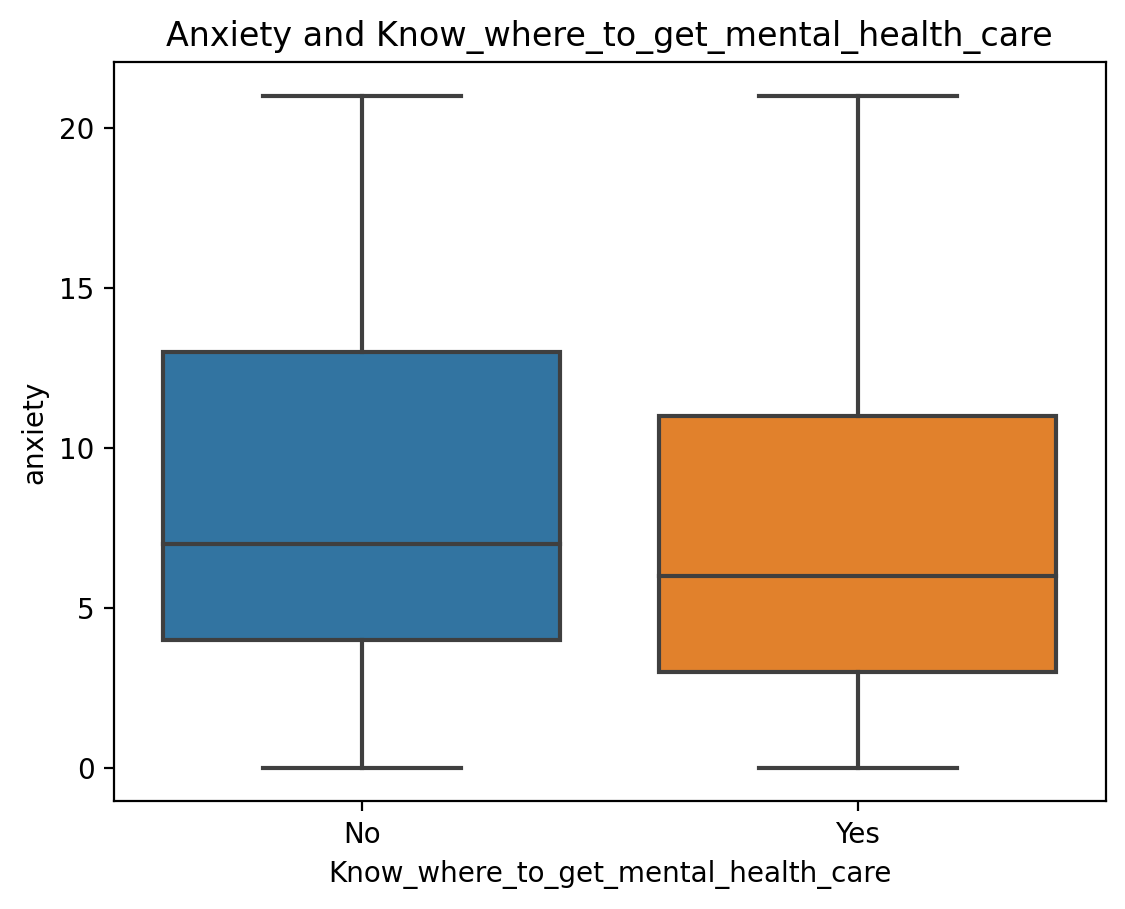

In [15]:
# anxiety and know where to get mental health care
sns.boxplot(x='knowwher', y="anxiety", data=matched_data)
plt.xlabel("Know_where_to_get_mental_health_care")
plt.xticks([0.0,1.0], ['No', 'Yes'])
plt.title("Anxiety and Know_where_to_get_mental_health_care")   
plt.show()

In [16]:
# t-test
stats.ttest_ind(matched_data[matched_data['knowwher']==0]['anxiety'], matched_data[matched_data['knowwher']==1]['anxiety'])
print('the p-value is close to:', 0.000000)

the p-value is close to: 0.0


### regression on C(knowwher)

In [17]:
smf.wls('anxiety ~ C(is_online)+C(knowwher)', data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.012
Model:                            WLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     233.9
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          9.93e-102
Time:                        12:40:20   Log-Likelihood:            -1.2799e+05
No. Observations:               40054   AIC:                         2.560e+05
Df Residuals:                   40051   BIC:                         2.560e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.8088      0.069    127.935      0.000       8.674       8.944
C(is_online)[T.1.0]    -0.1116      0.057     -1.954      0.051      -0.224       0.000
C(knowwher)[T.1.0]     -1.5146      0.070    -21.620      0.000      -1.652      -1.377
==============================================================================
Omnibus:                     2760.800   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3337.990
Skew:                           0.701   Prob(JB):                         0.00
Kurtosis:                       2.820   Cond. No.                         4.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
smf.wls('anxiety ~ C(is_online)*C(knowwher)+ cases_per_10k', data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.012
Model:                            WLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     117.4
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          9.11e-100
Time:                        12:40:20   Log-Likelihood:            -1.2799e+05
No. Observations:               40054   AIC:                         2.560e+05
Df Residuals:                   40049   BIC:                         2.560e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  8.8581      0.092     96.466      0.000       8.678       9.038
C(is_online)[T.1.0]                       -0.1566      0.124     -1.258      0.208      -0.401       0.087
C(knowwher)[T.1.0]                        -1.5392      0.099    -15.517      0.000      -1.734      -1.345
C(is_online)[T.1.0]:C(knowwher)[T.1.0]     0.0512      0.140      0.365      0.715      -0.223       0.326
cases_per_10k                             -0.0015      0.001     -1.319      0.187      -0.004       0.001
==============================================================================
Omnibus:                     2760.870   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3338.291
Skew:                           0.701   Prob(JB):                         0.00
Kurtosis:                       2.820   Cond. No.                         230.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Anxiety and enrollment

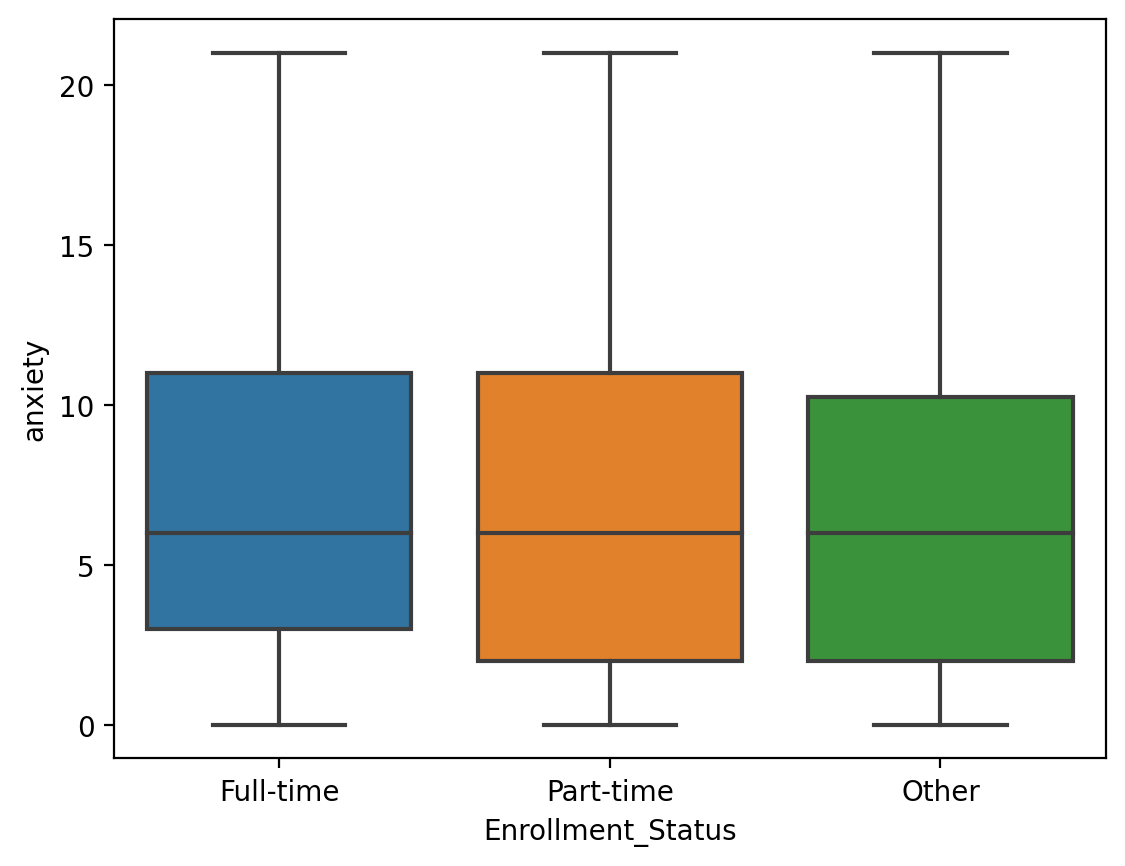

In [19]:
# anxiety and enrollment
sns.boxplot(x='enroll', y="anxiety", data=matched_data)
# Change x tick labels to be more readable
plt.xticks([0.0,1.0, 2.0], ['Full-time', 'Part-time', 'Other'])
plt.xlabel("Enrollment_Status")
plt.show()

In [20]:
matched_data['enroll'].value_counts()

1.0    37336
2.0     2598
3.0      120
Name: enroll, dtype: int64

In [21]:
# t-test on anxiety and enrollment on full-time and part-time
full_time = matched_data[matched_data['enroll'] == 1.0]['anxiety']  
part_time = matched_data[matched_data['enroll'] == 2.0]['anxiety']
stats.ttest_ind(full_time, part_time)


Ttest_indResult(statistic=3.1724975643570583, pvalue=0.001512482372778781)

In [22]:
smf.wls('anxiety ~ C(enroll)', data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     19.51
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           3.41e-09
Time:                        12:40:21   Log-Likelihood:            -1.2821e+05
No. Observations:               40054   AIC:                         2.564e+05
Df Residuals:                   40051   BIC:                         2.564e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.6091      0.030    256.495      0.000       7.551       7.667
C(enroll)[T.2.0]    -0.6867      0.112     -6.125      0.000      -0.906      -0.467
C(enroll)[T.3.0]    -0.6625      0.502     -1.320      0.187      -1.646       0.321
==============================================================================
Omnibus:                     2846.970   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3464.165
Skew:                           0.715   Prob(JB):                         0.00
Kurtosis:                       2.820   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# put all the columns into a list
cols = matched_data.columns.tolist()
cols = cols[4:]
cols

['age',
 'sex_birth',
 'gender_male',
 'gender_female',
 'gender_transm',
 'gender_transf',
 'sexual_other',
 'gender_nonbin',
 'gender_selfid',
 'sexual_h',
 'sexual_l',
 'sexual_g',
 'sexual_bi',
 'sexual_queer',
 'sexual_quest',
 'sexual_asexual',
 'sexual_pan',
 'race_black',
 'race_ainaan',
 'race_asian',
 'race_his',
 'race_pi',
 'race_mides',
 'race_white',
 'race_other',
 'international',
 'educ_par1',
 'educ_par2',
 'scholarship_status_1',
 'children_dep',
 'hours_work_paid',
 'transfer',
 'yr_sch',
 'enroll',
 'persist',
 'disab_1',
 'disab_2',
 'positive_mental_health',
 'risk_of_depression',
 'anxiety',
 'timestud',
 'sui_idea',
 'lone_isolated',
 'abuse_life',
 'assault_emo',
 'alc_any',
 'sub_cig',
 'sub_any',
 'exerc',
 'sleep_wknight',
 'dx_any',
 'knowwher',
 'meds_any',
 'degree_ass',
 'degree_bach',
 'degree_ma',
 'degree_jd',
 'degree_md',
 'degree_phd',
 'degree_other',
 'degree_nd',
 'gr_a',
 'gr_b',
 'gr_c',
 'gr_d',
 'gr_f',
 'gr_none',
 'gr_dk',
 'satisfied_ove

### Start with regression with only C(in_online) and both C(in_online) + cases_per_10k
> Both shows sort of counterintuitive results (online less anxiety) with p value > 0.05

In [24]:
smf.wls('anxiety ~ C(is_online)', data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4200
Date:                Mon, 17 Apr 2023   Prob (F-statistic):              0.517
Time:                        12:40:21   Log-Likelihood:            -1.2823e+05
No. Observations:               40054   AIC:                         2.565e+05
Df Residuals:                   40052   BIC:                         2.565e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.5760      0.039    195.165      0.000       7.500       7.652
C(is_online)[T.1.0]    -0.0372      0.057     -0.648      0.517      -0.150       0.075
==============================================================================
Omnibus:                     2835.075   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3443.941
Skew:                           0.712   Prob(JB):                         0.00
Kurtosis:                       2.816   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
smf.wls('anxiety ~ C(is_online)+cases_per_10k', data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.413
Date:                Mon, 17 Apr 2023   Prob (F-statistic):              0.244
Time:                        12:40:21   Log-Likelihood:            -1.2823e+05
No. Observations:               40054   AIC:                         2.565e+05
Df Residuals:                   40051   BIC:                         2.565e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.6106      0.045    170.051      0.000       7.523       7.698
C(is_online)[T.1.0]    -0.0427      0.057     -0.743      0.457      -0.155       0.070
cases_per_10k          -0.0018      0.001     -1.551      0.121      -0.004       0.000
==============================================================================
Omnibus:                     2835.365   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3444.532
Skew:                           0.712   Prob(JB):                         0.00
Kurtosis:                       2.816   Cond. No.                         72.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
smf.wls('anxiety ~ C(is_online)+cases_per_10k+C(state_new)', data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.011
Model:                            WLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     12.27
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           5.48e-69
Time:                        12:40:21   Log-Likelihood:            -1.2801e+05
No. Observations:               40054   AIC:                         2.561e+05
Df Residuals:                   40018   BIC:                         2.564e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.1763      0.095     75.353      0.000       6.990       7.363
C(is_online)[T.1.0]                 -0.0183      0.060     -0.303      0.762      -0.136       0.100
C(state_new)[T.Colorado]             0.8125      0.235      3.464      0.001       0.353       1.272
C(state_new)[T.Connecticut]          0.4471      0.122      3.665      0.000       0.208       0.686
C(state_new)[T.Florida]              1.4680      0.205      7.168      0.000       1.067       1.869
C(state_new)[T.Georgia]              0.3440      0.216      1.596      0.111      -0.078       0.766
C(state_new)[T.Idaho]                0.4034      0.256      1.578      0.115      -0.098       0.904
C(state_new)[T.Illinois]            -0.5675      0.277     -2.051      0.040      -1.110      -0.025
C(state_new)[T.Indiana]              1.1808      0.251      4.706      0.000       0.689       1.673
C(state_new)[T.Kansas]               0.7327      0.719      1.019      0.308      -0.676       2.142
C(state_new)[T.Kentucky]             1.8438      0.285      6.462      0.000       1.285       2.403
C(state_new)[T.Maryland]             1.7619      0.431      4.084      0.000       0.916       2.608
C(state_new)[T.Massachusetts]        0.5880      0.123      4.796      0.000       0.348       0.828
C(state_new)[T.Michigan]            -0.3468      0.217     -1.600      0.110      -0.772       0.078
C(state_new)[T.Minnesota]            1.8552      0.314      5.911      0.000       1.240       2.470
C(state_new)[T.Mississippi]          2.0418      0.381      5.353      0.000       1.294       2.789
C(state_new)[T.Nebraska]            -0.3996      0.287     -1.391      0.164      -0.963       0.164
C(state_new)[T.Nevada]               0.9571      0.241      3.976      0.000       0.485       1.429
C(state_new)[T.New Hampshire]       -0.8201      0.196     -4.177      0.000      -1.205      -0.435
C(state_new)[T.New Jersey]           0.5085      0.285      1.784      0.074      -0.050       1.067
C(state_new)[T.New York]             1.5910      0.211      7.530      0.000       1.177       2.005
C(state_new)[T.North Carolina]       0.6043      0.176      3.443      0.001       0.260       0.948
C(state_new)[T.Ohio]                 0.6845      0.133      5.132      0.000       0.423       0.946
C(state_new)[T.Oklahoma]             1.3899      0.496      2.800      0.005       0.417       2.363
C(state_new)[T.Oregon]               1.7979      0.312      5.764      0.000       1.187       2.409
C(state_new)[T.Pennsylvania]         1.0654      0.211      5.039      0.000       0.651       1.480
C(state_new)[T.Rhode Island]         2.7069      0.374      7.230      0.000       1.973       3.441
C(state_new)[T.Tennessee]            1.0583      0.16

### both C(in_online) + cases_per_10k AND enroll

In [27]:
smf.wls('anxiety ~ C(is_online)+cases_per_10k+ C(enroll)', data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     10.28
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           2.57e-08
Time:                        12:40:21   Log-Likelihood:            -1.2821e+05
No. Observations:               40054   AIC:                         2.564e+05
Df Residuals:                   40049   BIC:                         2.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.6428      0.045    169.702      0.000       7.554       7.731
C(is_online)[T.1.0]    -0.0088      0.058     -0.153      0.879      -0.122       0.104
C(enroll)[T.2.0]       -0.6834      0.113     -6.070      0.000      -0.904      -0.463
C(enroll)[T.3.0]       -0.6588      0.502     -1.312      0.189      -1.643       0.325
cases_per_10k          -0.0016      0.001     -1.449      0.147      -0.004       0.001
==============================================================================
Omnibus:                     2846.840   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3464.035
Skew:                           0.715   Prob(JB):                         0.00
Kurtosis:                       2.820   Cond. No.                         548.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
smf.wls('anxiety ~ C(is_online)+cases_per_10k+C(state_new)+ C(enroll)', data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.011
Model:                            WLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     12.33
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           3.27e-73
Time:                        12:40:21   Log-Likelihood:            -1.2800e+05
No. Observations:               40054   AIC:                         2.561e+05
Df Residuals:                   40016   BIC:                         2.564e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.2632      0.097     75.120      0.000       7.074       7.453
C(is_online)[T.1.0]                 -0.0009      0.060     -0.016      0.987      -0.119       0.117
C(state_new)[T.Colorado]             0.7500      0.235      3.195      0.001       0.290       1.210
C(state_new)[T.Connecticut]          0.3935      0.122      3.216      0.001       0.154       0.633
C(state_new)[T.Florida]              1.3881      0.205      6.761      0.000       0.986       1.791
C(state_new)[T.Georgia]              0.2775      0.216      1.285      0.199      -0.146       0.701
C(state_new)[T.Idaho]                0.4390      0.256      1.718      0.086      -0.062       0.940
C(state_new)[T.Illinois]            -0.5913      0.277     -2.137      0.033      -1.134      -0.049
C(state_new)[T.Indiana]              1.1248      0.251      4.480      0.000       0.633       1.617
C(state_new)[T.Kansas]               0.8669      0.719      1.206      0.228      -0.543       2.276
C(state_new)[T.Kentucky]             1.7259      0.286      6.031      0.000       1.165       2.287
C(state_new)[T.Maryland]             1.6860      0.432      3.907      0.000       0.840       2.532
C(state_new)[T.Massachusetts]        0.5188      0.123      4.207      0.000       0.277       0.760
C(state_new)[T.Michigan]            -0.4210      0.217     -1.938      0.053      -0.847       0.005
C(state_new)[T.Minnesota]            1.7761      0.314      5.654      0.000       1.160       2.392
C(state_new)[T.Mississippi]          1.9674      0.382      5.155      0.000       1.219       2.715
C(state_new)[T.Nebraska]            -0.4736      0.288     -1.647      0.100      -1.037       0.090
C(state_new)[T.Nevada]               0.9008      0.241      3.739      0.000       0.429       1.373
C(state_new)[T.New Hampshire]       -0.9178      0.197     -4.654      0.000      -1.304      -0.531
C(state_new)[T.New Jersey]           0.4954      0.285      1.739      0.082      -0.063       1.054
C(state_new)[T.New York]             1.4966      0.212      7.059      0.000       1.081       1.912
C(state_new)[T.North Carolina]       0.5212      0.176      2.957      0.003       0.176       0.867
C(state_new)[T.Ohio]                 0.6304      0.134      4.712      0.000       0.368       0.893
C(state_new)[T.Oklahoma]             1.4308      0.496      2.883      0.004       0.458       2.403
C(state_new)[T.Oregon]               1.7245      0.312      5.525      0.000       1.113       2.336
C(state_new)[T.Pennsylvania]         1.0008      0.212      4.727      0.000       0.586       1.416
C(state_new)[T.Rhode Island]         2.6035      0.375      6.945      0.000       1.869       3.338
C(state_new)[T.Tennessee]            0.9764      0.16

In [29]:
smf.wls('anxiety ~ C(is_online)*C(enroll)+cases_per_10k', data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.699
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           2.74e-08
Time:                        12:40:22   Log-Likelihood:            -1.2820e+05
No. Observations:               40054   AIC:                         2.564e+05
Df Residuals:                   40047   BIC:                         2.565e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                7.6546      0.046    167.730      0.000       7.565       7.744
C(is_online)[T.1.0]                     -0.0342      0.060     -0.572      0.568      -0.151       0.083
C(enroll)[T.2.0]                        -0.8611      0.180     -4.775      0.000      -1.215      -0.508
C(enroll)[T.3.0]                        -2.0629      0.902     -2.286      0.022      -3.831      -0.295
C(is_online)[T.1.0]:C(enroll)[T.2.0]     0.2929      0.231      1.269      0.205      -0.160       0.745
C(is_online)[T.1.0]:C(enroll)[T.3.0]     2.0405      1.086      1.879      0.060      -0.088       4.169
cases_per_10k                           -0.0017      0.001     -1.475      0.140      -0.004       0.001
==============================================================================
Omnibus:                     2850.103   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3469.688
Skew:                           0.715   Prob(JB):                         0.00
Kurtosis:                       2.822   Cond. No.                     1.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> `C(is_online)[T.1.0]` is the difference between full_time + on_line/inperson --- negative

> `C(is_online)[T.1.0]:C(enroll)[T.2.0]+C(is_online)[T.1.0]`is the difference between part_time + on_line/inperson(compared to full_time) ---positive

In [30]:
smf.wls('anxiety ~ C(is_online)*C(enroll)+cases_per_10k+C(state_new)', data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.011
Model:                            WLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     11.83
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           4.36e-73
Time:                        12:40:22   Log-Likelihood:            -1.2800e+05
No. Observations:               40054   AIC:                         2.561e+05
Df Residuals:                   40014   BIC:                         2.564e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                7.2757      0.097     75.104      0.000       7.086       7.466
C(is_online)[T.1.0]                     -0.0304      0.063     -0.485      0.627      -0.153       0.092
C(enroll)[T.2.0]                        -0.7833      0.181     -4.324      0.000      -1.138      -0.428
C(enroll)[T.3.0]                        -1.8240      0.899     -2.029      0.042      -3.586      -0.062
C(state_new)[T.Colorado]                 0.7445      0.235      3.171      0.002       0.284       1.205
C(state_new)[T.Connecticut]              0.3974      0.122      3.246      0.001       0.157       0.637
C(state_new)[T.Florida]                  1.3856      0.205      6.748      0.000       0.983       1.788
C(state_new)[T.Georgia]                  0.2862      0.216      1.325      0.185      -0.137       0.709
C(state_new)[T.Idaho]                    0.4383      0.256      1.714      0.086      -0.063       0.939
C(state_new)[T.Illinois]                -0.5982      0.277     -2.162      0.031      -1.141      -0.056
C(state_new)[T.Indiana]                  1.1220      0.251      4.469      0.000       0.630       1.614
C(state_new)[T.Kansas]                   0.8609      0.719      1.197      0.231      -0.549       2.270
C(state_new)[T.Kentucky]                 1.7209      0.286      6.014      0.000       1.160       2.282
C(state_new)[T.Maryland]                 1.6838      0.432      3.901      0.000       0.838       2.530
C(state_new)[T.Massachusetts]            0.5175      0.123      4.197      0.000       0.276       0.759
C(state_new)[T.Michigan]                -0.4280      0.217     -1.970      0.049      -0.854      -0.002
C(state_new)[T.Minnesota]                1.7737      0.314      5.646      0.000       1.158       2.389
C(state_new)[T.Mississippi]              1.9594      0.382      5.134      0.000       1.211       2.707
C(state_new)[T.Nebraska]                -0.4715      0.288     -1.639      0.101      -1.035       0.092
C(state_new)[T.Nevada]                   0.9062      0.241      3.761      0.000       0.434       1.379
C(state_new)[T.New Hampshire]           -0.9251      0.197     -4.691      0.000      -1.312      -0.539
C(state_new)[T.New Jersey]               0.5026      0.285      1.763      0.078      -0.056       1.061
C(state_new)[T.New York]                 1.5033      0.212      7.088      0.000       1.088       1.919
C(state_new)[T.North Carolina]           0.5232      0.176      2.968      0.003       0.178       0.869
C(state_new)[T.Ohio]                     0.6294      0.134      4.705      0.000       0.367       0.892
C(state_new)[T.Oklahoma]                 1.4250      0.496      2.871      0.004       0.452       2.398
C(state_new)[T.Oregon]                

### Try adding all variables as controls
> Still the same

In [31]:
#put cols in to a string
cols_str = "+".join(cols)
cols_str

'age+sex_birth+gender_male+gender_female+gender_transm+gender_transf+sexual_other+gender_nonbin+gender_selfid+sexual_h+sexual_l+sexual_g+sexual_bi+sexual_queer+sexual_quest+sexual_asexual+sexual_pan+race_black+race_ainaan+race_asian+race_his+race_pi+race_mides+race_white+race_other+international+educ_par1+educ_par2+scholarship_status_1+children_dep+hours_work_paid+transfer+yr_sch+enroll+persist+disab_1+disab_2+positive_mental_health+risk_of_depression+anxiety+timestud+sui_idea+lone_isolated+abuse_life+assault_emo+alc_any+sub_cig+sub_any+exerc+sleep_wknight+dx_any+knowwher+meds_any+degree_ass+degree_bach+degree_ma+degree_jd+degree_md+degree_phd+degree_other+degree_nd+gr_a+gr_b+gr_c+gr_d+gr_f+gr_none+gr_dk+satisfied_overall+deport_worry+fincur+finpast+food_worry+food_notlast+inst_state+first_gen+is_online+weights+match_group_size+match_group+week-year+state+new_case+state_new+2020+cases_per_cap+cases_per_10k'

In [32]:
smf.wls('anxiety ~ age+C(sex_birth)+gender_male+gender_female+gender_transm+gender_transf+sexual_other'+
        '+gender_nonbin+gender_selfid+sexual_h+sexual_l+sexual_g+sexual_bi+sexual_queer+sexual_quest+sexual_asexual'+
        '+sexual_pan+race_black+race_ainaan+race_asian+race_his+race_pi+race_mides+race_white+race_other'+
        '+C(international)+ C(educ_par1)+ C(educ_par2)+ C(scholarship_status_1)+C(children_dep)+hours_work_paid'+
        '+C(transfer)+C(yr_sch)+C(enroll)+C(persist)+C(disab_1)+C(disab_2)+C(positive_mental_health)'+
        '+C(risk_of_depression)+C(timestud)+C(sui_idea)+C(lone_isolated)+C(abuse_life)+C(assault_emo)'+
        '+C(alc_any)+C(sub_cig)+C(sub_any)+C(exerc)+sleep_wknight+C(dx_any)+C(knowwher)+C(meds_any)'+
        '+degree_ass+degree_bach+degree_ma+degree_jd+degree_md+degree_phd+degree_other+degree_nd'+
        '+gr_a+gr_b+gr_c+gr_d+gr_f+gr_none+gr_dk+C(satisfied_overall)+C(deport_worry)+C(fincur)+C(finpast)'+
        '+C(food_worry)+C(food_notlast)+C(state_new)+C(first_gen)+C(is_online)+cases_per_10k', data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.545
Model:                            WLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     286.3
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:40:24   Log-Likelihood:            -1.1245e+05
No. Observations:               40054   AIC:                         2.252e+05
Df Residuals:                   39886   BIC:                         2.267e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            9.1485      0.450     20.333      0.000       8.267      10.030
C(sex_birth)[T.2.0]                 -1.1370      0.213     -5.329      0.000      -1.555      -0.719
C(sex_birth)[T.3.0]                 -0.8671      0.920     -0.942      0.346      -2.671       0.937
C(sex_birth)[T.7.0]                 -0.8020      0.697     -1.150      0.250      -2.169       0.565
C(international)[T.1.0]             -0.1818      0.085     -2.150      0.032      -0.348      -0.016
C(educ_par1)[T.2.0]                  0.0727      0.159      0.458      0.647      -0.239       0.384
C(educ_par1)[T.3.0]                  0.1781      0.141      1.264      0.206      -0.098       0.454
C(educ_par1)[T.4.0]                  0.2394      0.158      1.514      0.130      -0.070       0.549
C(educ_par1)[T.5.0]                  0.2233      0.164      1.366      0.172      -0.097       0.544
C(educ_par1)[T.6.0]                  0.1531      0.154      0.995      0.320      -0.148       0.455
C(educ_par1)[T.7.0]                  0.2885      0.156      1.855      0.064      -0.016       0.593
C(educ_par1)[T.8.0]                 -0.0891      0.271     -0.329      0.742      -0.619       0.441
C(educ_par2)[T.2.0]                  0.0387      0.154      0.251      0.802      -0.263       0.341
C(educ_par2)[T.3.0]                  0.0720      0.140      0.515      0.607      -0.202       0.346
C(educ_par2)[T.4.0]                  0.1925      0.154      1.250      0.211      -0.109       0.494
C(educ_par2)[T.5.0]                  0.2319      0.160      1.448      0.148      -0.082       0.546
C(educ_par2)[T.6.0]                  0.1704      0.151      1.128      0.259      -0.126       0.466
C(educ_par2)[T.7.0]                  0.0771      0.153      0.503      0.615      -0.223       0.377
C(educ_par2)[T.8.0]                 -0.1083      0.192     -0.563      0.574      -0.486       0.269
C(scholarship_status_1)[T.1.0]       0.0133      0.046      0.291      0.771      -0.076       0.103
C(children_dep)[T.2.0]               0.1808      0.097      1.861      0.063      -0.010       0.371
C(children_dep)[T.3.0]               0.1574      0.106      1.488      0.137      -0.050       0.365
C(children_dep)[T.4.0]               0.1649      0.145      1.141      0.254      -0.118       0.448
C(children_dep)[T.5.0]              -0.0167      0.153     -0.109      0.913      -0.317       0.283
C(transfer)[T.1.0]                  -0.0976      0.072     -1.348      0.178      -0.240       0.044
C(yr_sch)[T.2.0]                     0.1565      0.052      3.028      0.002       0.055       0.258
C(yr_sch)[T.3.0]                     0.3133      0.059      5.284      0.000       0.197       0.429
C(yr_sch)[T.4.0]                     0.2869      0.06

### Try different combinations of selected control variables
> None of below shows desired results

In [33]:
# delete some variables state/educ(already in the first_gen)
smf.wls('anxiety ~ age+C(sex_birth)+gender_male+gender_female+gender_transm+gender_transf+sexual_other'+
        '+gender_nonbin+gender_selfid+sexual_h+sexual_l+sexual_g+sexual_bi+sexual_queer+sexual_quest+sexual_asexual'+
        '+sexual_pan+race_black+race_ainaan+race_asian+race_his+race_pi+race_mides+race_white+race_other'+
        '+C(international)+ C(scholarship_status_1)+C(children_dep)+hours_work_paid'+
        '+C(transfer)+C(yr_sch)+C(enroll)+C(persist)+C(disab_1)+C(disab_2)+C(positive_mental_health)'+
        '+C(risk_of_depression)+C(timestud)+C(sui_idea)+C(lone_isolated)+C(abuse_life)+C(assault_emo)'+
        '+C(alc_any)+C(sub_cig)+C(sub_any)+C(exerc)+sleep_wknight+C(dx_any)+C(knowwher)+C(meds_any)'+
        '+degree_ass+degree_bach+degree_ma+degree_jd+degree_md+degree_phd+degree_other+degree_nd'+
        '+gr_a+gr_b+gr_c+gr_d+gr_f+gr_none+gr_dk+C(satisfied_overall)+C(deport_worry)+C(fincur)+C(finpast)'+
        '+C(food_worry)+C(food_notlast)+C(first_gen)+C(is_online)+cases_per_10k', data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.544
Model:                            WLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     396.4
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:40:27   Log-Likelihood:            -1.1252e+05
No. Observations:               40054   AIC:                         2.253e+05
Df Residuals:                   39933   BIC:                         2.263e+05
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          9.5426      0.417     22.908      0.000       8.726      10.359
C(sex_birth)[T.2.0]               -1.1411      0.213     -5.348      0.000      -1.559      -0.723
C(sex_birth)[T.3.0]               -0.9032      0.921     -0.981      0.327      -2.708       0.901
C(sex_birth)[T.7.0]               -0.8987      0.698     -1.288      0.198      -2.267       0.469
C(international)[T.1.0]           -0.1975      0.084     -2.357      0.018      -0.362      -0.033
C(scholarship_status_1)[T.1.0]     0.0307      0.044      0.690      0.490      -0.056       0.118
C(children_dep)[T.2.0]             0.1846      0.097      1.899      0.058      -0.006       0.375
C(children_dep)[T.3.0]             0.1660      0.106      1.569      0.117      -0.041       0.373
C(children_dep)[T.4.0]             0.1650      0.145      1.141      0.254      -0.118       0.448
C(children_dep)[T.5.0]            -0.0374      0.153     -0.244      0.807      -0.338       0.263
C(transfer)[T.1.0]                -0.0769      0.072     -1.070      0.285      -0.218       0.064
C(yr_sch)[T.2.0]                   0.1523      0.052      2.949      0.003       0.051       0.254
C(yr_sch)[T.3.0]                   0.3137      0.059      5.293      0.000       0.198       0.430
C(yr_sch)[T.4.0]                   0.2956      0.068      4.376      0.000       0.163       0.428
C(yr_sch)[T.5.0]                   0.1225      0.151      0.811      0.417      -0.173       0.419
C(yr_sch)[T.6.0]                   0.3596      0.368      0.976      0.329      -0.362       1.081
C(yr_sch)[T.7.0]                   0.1619      0.450      0.360      0.719      -0.719       1.043
C(enroll)[T.2.0]                   0.0193      0.086      0.225      0.822      -0.149       0.188
C(enroll)[T.3.0]                  -0.0876      0.345     -0.254      0.799      -0.764       0.588
C(persist)[T.2.0]                  0.0730      0.047      1.562      0.118      -0.019       0.165
C(persist)[T.3.0]                  0.1742      0.066      2.652      0.008       0.045       0.303
C(persist)[T.4.0]                 -0.0177      0.175     -0.101      0.919      -0.361       0.325
C(persist)[T.5.0]                  0.4056      0.323      1.254      0.210      -0.228       1.040
C(persist)[T.6.0]                  0.4145      0.400      1.036      0.300      -0.369       1.198
C(disab_1)[T.1.0]                  0.1430      0.176      0.811      0.418      -0.203       0.489
C(disab_1)[T.2.0]                 -0.0530      0.103     -0.514      0.607      -0.255       0.149
C(disab_1)[T.3.0]                  0.1850      0.128      1.446      0.148      -0.066       0.436
C(disab_2)[T.2.0]                 -0.1167      0.201     -0.582      0.561      -0.510       0.276
C(disab_2)[T.3

enroll---enrollment status(parttime fulltime other)

In [34]:
# further delete some that not that relevant + not that significant
# transfer(whether transfer from another school)
# disab_1 2
# sub_cig, sub_any, med_any
# exerc
# deport_worry
# food_worry, food_notlast

smf.wls('anxiety ~ age+C(sex_birth)+gender_male+gender_female+gender_transm+gender_transf+sexual_other'+
        '+gender_nonbin+gender_selfid+sexual_h+sexual_l+sexual_g+sexual_bi+sexual_queer+sexual_quest+sexual_asexual'+
        '+sexual_pan+race_black+race_ainaan+race_asian+race_his+race_pi+race_mides+race_white+race_other'+
        '+C(international)+ C(scholarship_status_1)+C(children_dep)+hours_work_paid'+
        '+C(yr_sch)+C(enroll)+C(persist)+C(positive_mental_health)'+
        '+C(risk_of_depression)+C(timestud)+C(sui_idea)+C(lone_isolated)+C(abuse_life)+C(assault_emo)'+
        '+C(alc_any)+sleep_wknight+C(dx_any)+C(knowwher)'+
        '+degree_ass+degree_bach+degree_ma+degree_jd+degree_md+degree_phd+degree_other+degree_nd'+
        '+gr_a+gr_b+gr_c+gr_d+gr_f+gr_none+gr_dk+C(satisfied_overall)+C(fincur)+C(finpast)'+
        '+C(first_gen)+C(is_online)+cases_per_10k', data=matched_data, weights = matched_data['weights']).fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.543
Model:                            WLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     475.4
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:40:28   Log-Likelihood:            -1.1253e+05
No. Observations:               40054   AIC:                         2.253e+05
Df Residuals:                   39953   BIC:                         2.261e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          9.5684      0.415     23.051      0.000       8.755      10.382
C(sex_birth)[T.2.0]               -1.1363      0.213     -5.329      0.000      -1.554      -0.718
C(sex_birth)[T.3.0]               -0.8949      0.920     -0.972      0.331      -2.699       0.909
C(sex_birth)[T.7.0]               -0.9011      0.698     -1.291      0.197      -2.269       0.467
C(international)[T.1.0]           -0.2015      0.083     -2.415      0.016      -0.365      -0.038
C(scholarship_status_1)[T.1.0]     0.0295      0.044      0.666      0.505      -0.057       0.116
C(children_dep)[T.2.0]             0.1840      0.097      1.893      0.058      -0.006       0.374
C(children_dep)[T.3.0]             0.1644      0.106      1.554      0.120      -0.043       0.372
C(children_dep)[T.4.0]             0.1616      0.145      1.118      0.263      -0.122       0.445
C(children_dep)[T.5.0]            -0.0387      0.153     -0.253      0.800      -0.339       0.261
C(yr_sch)[T.2.0]                   0.1515      0.052      2.937      0.003       0.050       0.253
C(yr_sch)[T.3.0]                   0.3102      0.059      5.262      0.000       0.195       0.426
C(yr_sch)[T.4.0]                   0.2938      0.067      4.363      0.000       0.162       0.426
C(yr_sch)[T.5.0]                   0.1107      0.151      0.735      0.462      -0.184       0.406
C(yr_sch)[T.6.0]                   0.3584      0.368      0.974      0.330      -0.363       1.080
C(yr_sch)[T.7.0]                   0.1508      0.449      0.335      0.737      -0.730       1.032
C(enroll)[T.2.0]                   0.0276      0.086      0.321      0.748      -0.141       0.196
C(enroll)[T.3.0]                  -0.0740      0.345     -0.215      0.830      -0.749       0.601
C(persist)[T.2.0]                  0.0742      0.047      1.588      0.112      -0.017       0.166
C(persist)[T.3.0]                  0.1765      0.066      2.691      0.007       0.048       0.305
C(persist)[T.4.0]                  0.0035      0.175      0.020      0.984      -0.339       0.346
C(persist)[T.5.0]                  0.4143      0.323      1.281      0.200      -0.219       1.048
C(persist)[T.6.0]                  0.4404      0.400      1.102      0.270      -0.343       1.224
C(positive_mental_health)[T.1]    -0.8727      0.051    -17.250      0.000      -0.972      -0.774
C(risk_of_depression)[T.2]        -1.8720      0.052    -35.746      0.000      -1.975      -1.769
C(risk_of_depression)[T.3]         3.2116      0.057     55.857      0.000       3.099       3.324
C(risk_of_depression)[T.4]         5.3613      0.076     70.092      0.000       5.211       5.511
C(risk_of_depression)[T.5]         7.9670      0.102     77.856      0.000       7.766       8.168
C(timestud)[T.

In [35]:
# delete satisfied overall
smf.wls('anxiety ~ age+C(sex_birth)+gender_male+gender_female+gender_transm+gender_transf+sexual_other'+
        '+gender_nonbin+gender_selfid+sexual_h+sexual_l+sexual_g+sexual_bi+sexual_queer+sexual_quest+sexual_asexual'+
        '+sexual_pan+race_black+race_ainaan+race_asian+race_his+race_pi+race_mides+race_white+race_other'+
        '+C(international)+ C(scholarship_status_1)+C(children_dep)+hours_work_paid'+
        '+C(yr_sch)+C(enroll)+C(persist)+C(positive_mental_health)'+
        '+C(risk_of_depression)+C(timestud)+C(sui_idea)+C(lone_isolated)+C(abuse_life)+C(assault_emo)'+
        '+C(alc_any)+sleep_wknight+C(dx_any)+C(knowwher)'+
        '+degree_ass+degree_bach+degree_ma+degree_jd+degree_md+degree_phd+degree_other+degree_nd'+
        '+gr_a+gr_b+gr_c+gr_d+gr_f+gr_none+gr_dk+C(fincur)+C(finpast)'+
        '+C(first_gen)+C(is_online)+cases_per_10k', data=matched_data, weights = matched_data['weights']).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.543
Model:                            WLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     499.9
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:40:30   Log-Likelihood:            -1.1254e+05
No. Observations:               40054   AIC:                         2.253e+05
Df Residuals:                   39958   BIC:                         2.261e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          9.4451      0.366     25.841      0.000       8.729      10.162
C(sex_birth)[T.2.0]               -1.1427      0.213     -5.358      0.000      -1.561      -0.725
C(sex_birth)[T.3.0]               -0.8907      0.920     -0.968      0.333      -2.694       0.913
C(sex_birth)[T.7.0]               -0.9002      0.698     -1.290      0.197      -2.268       0.468
C(international)[T.1.0]           -0.1991      0.083     -2.386      0.017      -0.363      -0.036
C(scholarship_status_1)[T.1.0]     0.0282      0.044      0.636      0.525      -0.059       0.115
C(children_dep)[T.2.0]             0.1821      0.097      1.874      0.061      -0.008       0.373
C(children_dep)[T.3.0]             0.1688      0.106      1.596      0.111      -0.039       0.376
C(children_dep)[T.4.0]             0.1669      0.145      1.154      0.248      -0.116       0.450
C(children_dep)[T.5.0]            -0.0362      0.153     -0.237      0.813      -0.336       0.264
C(yr_sch)[T.2.0]                   0.1743      0.051      3.395      0.001       0.074       0.275
C(yr_sch)[T.3.0]                   0.3376      0.059      5.763      0.000       0.223       0.452
C(yr_sch)[T.4.0]                   0.3203      0.067      4.780      0.000       0.189       0.452
C(yr_sch)[T.5.0]                   0.1355      0.150      0.901      0.368      -0.159       0.430
C(yr_sch)[T.6.0]                   0.3904      0.368      1.060      0.289      -0.331       1.112
C(yr_sch)[T.7.0]                   0.1583      0.450      0.352      0.725      -0.723       1.039
C(enroll)[T.2.0]                   0.0243      0.086      0.283      0.777      -0.144       0.193
C(enroll)[T.3.0]                  -0.0900      0.345     -0.261      0.794      -0.766       0.586
C(persist)[T.2.0]                  0.0969      0.046      2.091      0.037       0.006       0.188
C(persist)[T.3.0]                  0.2159      0.065      3.327      0.001       0.089       0.343
C(persist)[T.4.0]                  0.0502      0.174      0.289      0.773      -0.290       0.391
C(persist)[T.5.0]                  0.4601      0.322      1.430      0.153      -0.171       1.091
C(persist)[T.6.0]                  0.5291      0.393      1.348      0.178      -0.240       1.299
C(positive_mental_health)[T.1]    -0.9241      0.049    -18.784      0.000      -1.021      -0.828
C(risk_of_depression)[T.2]        -1.8786      0.052    -35.879      0.000      -1.981      -1.776
C(risk_of_depression)[T.3]         3.2176      0.057     55.988      0.000       3.105       3.330
C(risk_of_depression)[T.4]         5.3640      0.076     70.164      0.000       5.214       5.514
C(risk_of_depression)[T.5]         7.9712      0.102     78.134      0.000       7.771       8.171
C(timestud)[T.